In [44]:
import pandas as pd
import datetime
import csv
import pprint as pprint
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
#import sklearn.datasets as dta
#from scipy.stats import linregress
#from scipy.stats import sem
import json
import requests
import os
from dotenv import load_dotenv
import gzip
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
census_key = os.getenv("census_api_key")

In [ ]:
#DF List so far


In [ ]:
# average_median_sale_price_by_quarter.csv
# housing_availability_by_zip_and_property_type.csv
# monthly_housingsale_available_inventory.csv
# quarterly_housingsale_available_inventory.csv
# rentals_by_quarters.csv
# seattle_rentals_by_zipcodes.csv
# total_housing_availability_by_month.csv
# yearly_housingsale_available_inventory.csv

In [ ]:
# graph and regression outline


# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp (C)']
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Build scatter plot for latitude vs. temperature
# plt.figure(figsize=(12,10))
# plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# # Incorporate the other graph properties2
# plt.title("Latitude vs Max Temps for Cities in the N. Hemisphere (2024-01-05)")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp (C)')
# plt.grid(True)
# plt.colorbar(label = "Temp")
# plt.annotate(line_eq, (20,5),fontsize=15,color="red")
# plt.plot(x_values, regress_values, "r-", label=line_eq)
# # Show plot
# plt.show()




# # Get regression values

# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# # Save the figure
# plt.savefig("../figures/fig_year_by_inventory.png")

In [2]:
# handling the year inventory csv
filepath_inventory = "../data_frames/yearly_housingsale_available_inventory.csv"
yearly_inventory = pd.read_csv(filepath_inventory)
yearly_inventory.head()

,Unnamed: 0,Zipcode,period_end,inventory
0,6,98101,2018-12-31,47.500000
1,7,98101,2019-12-31,56.250000
2,8,98101,2020-12-31,82.000000
3,9,98101,2021-12-31,59.833333
4,10,98101,2022-12-31,57.250000


In [3]:
yearly_inventory = yearly_inventory.drop(columns=['Unnamed: 0'])
yearly_inventory['period_end'] = pd.to_datetime(yearly_inventory['period_end'])
yearly_inventory

,Zipcode,period_end,inventory
0,98101,2018-12-31,47.500000
1,98101,2019-12-31,56.250000
2,98101,2020-12-31,82.000000
3,98101,2021-12-31,59.833333
4,98101,2022-12-31,57.250000
...,...,...,...
149,98199,2018-12-31,47.583333
150,98199,2019-12-31,59.916667
151,98199,2020-12-31,48.083333
152,98199,2021-12-31,33.250000


In [4]:
yearly_inventory.dtypes

Zipcode                int64
period_end    datetime64[ns]
inventory            float64
dtype: object

In [5]:
yearly_inventory['year'] = yearly_inventory['period_end'].dt.year

In [6]:
average_inventory_by_year = yearly_inventory.groupby('year')['inventory'].mean()
average_inventory_by_year

year
2018    45.934524
2019    61.747024
2020    58.538462
2021    38.474399
2022    43.374691
Name: inventory, dtype: float64

In [7]:
average_inventory_by_year = pd.DataFrame(average_inventory_by_year)
average_inventory_by_year

,inventory
year,
2018,45.934524
2019,61.747024
2020,58.538462
2021,38.474399
2022,43.374691


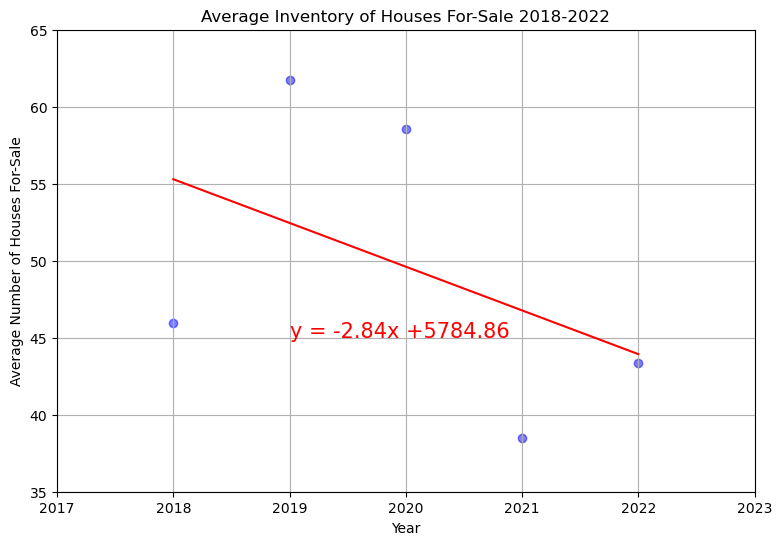

y = -2.84x +5784.86


In [8]:
x_values = average_inventory_by_year.index
y_values = average_inventory_by_year['inventory']


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Inventory of Houses For-Sale 2018-2022")
plt.xlabel('Year')
plt.ylabel('Average Number of Houses For-Sale')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2017, 2023)
plt.ylim(35, 65) 

plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)

In [9]:
# Save the figure
plt.savefig("../figures/fig_year_by_inventory.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
#FOR ALL YEARS

In [ ]:
# #Save yearly_inventory for all types of sales for the time frame based on zipcode - ready to graph and analyze
# yearly_inventory.to_csv("../data_frames/ALLYEARS_housingsale_available_inventory.csv", index=True)

In [11]:
# handling the ALLYEARS
filepath_inventoryALL = "../data_frames/ALLYEARS_housingsale_available_inventory.csv"
yearly_inventoryALL = pd.read_csv(filepath_inventoryALL)

In [16]:
yearly_inventoryALL
# yearly_inventoryALL['period_end'].unique()

,Unnamed: 0,Zipcode,period_end,inventory
0,0,98101,2012-12-31,53.400000
1,1,98101,2013-12-31,38.500000
2,2,98101,2014-12-31,26.666667
3,3,98101,2015-12-31,43.833333
4,4,98101,2016-12-31,33.916667
...,...,...,...,...
386,386,98199,2020-12-31,48.083333
387,387,98199,2021-12-31,33.250000
388,388,98199,2022-12-31,41.916667
389,389,98199,2023-12-31,37.250000


In [18]:
yearly_inventoryALL = yearly_inventoryALL.drop(columns=['Unnamed: 0'])
yearly_inventoryALL['period_end'] = pd.to_datetime(yearly_inventoryALL['period_end'])
yearly_inventoryALL

,Zipcode,period_end,inventory
0,98101,2012-12-31,53.400000
1,98101,2013-12-31,38.500000
2,98101,2014-12-31,26.666667
3,98101,2015-12-31,43.833333
4,98101,2016-12-31,33.916667
...,...,...,...
386,98199,2020-12-31,48.083333
387,98199,2021-12-31,33.250000
388,98199,2022-12-31,41.916667
389,98199,2023-12-31,37.250000


In [19]:
yearly_inventoryALL.dtypes

Zipcode                int64
period_end    datetime64[ns]
inventory            float64
dtype: object

In [20]:
yearly_inventoryALL['year'] = yearly_inventoryALL['period_end'].dt.year

In [21]:
average_inventory_by_yearALL = yearly_inventoryALL.groupby('year')['inventory'].mean()
average_inventory_by_yearALL

year
2012    64.540476
2013    58.487654
2014    52.083333
2015    37.212963
2016    35.006173
2017    27.547840
2018    45.934524
2019    61.747024
2020    58.538462
2021    38.474399
2022    43.374691
2023    43.179630
2024    33.185185
Name: inventory, dtype: float64

In [22]:
average_inventory_by_yearALL = pd.DataFrame(average_inventory_by_yearALL)
average_inventory_by_yearALL

,inventory
year,
2012,64.540476
2013,58.487654
2014,52.083333
2015,37.212963
2016,35.006173
2017,27.547840
2018,45.934524
2019,61.747024
2020,58.538462


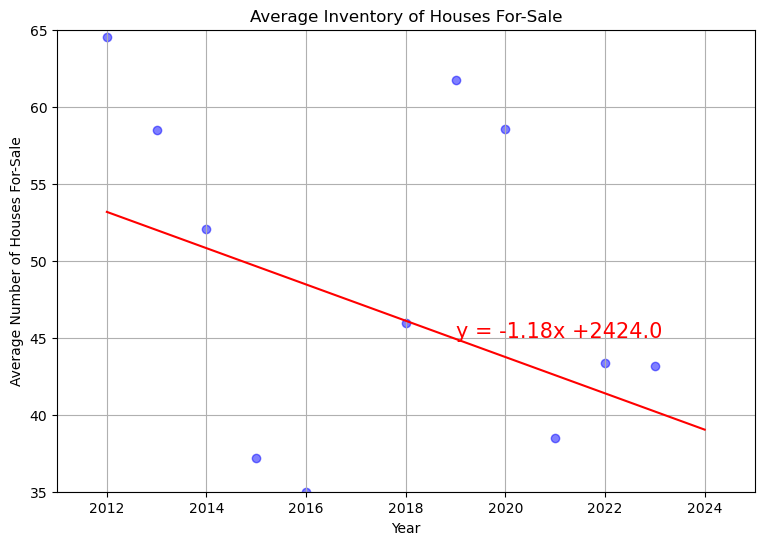

y = -1.18x +2424.0


In [24]:
x_values = average_inventory_by_yearALL.index
y_values = average_inventory_by_yearALL['inventory']


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Inventory of Houses For-Sale")
plt.xlabel('Year')
plt.ylabel('Average Number of Houses For-Sale')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2011, 2025)
plt.ylim(35, 65) 

plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)

In [25]:
# Save the figure for ALLYEARS
plt.savefig("../figures/fig_ALLYEARSyear_by_inventory.png")

<Figure size 640x480 with 0 Axes>

In [26]:
# Import from CSV
q_rentals = pd.read_csv("../data_frames/df2_rental_by_quarter.csv", index_col=0)
q_rentals

,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
Zipcode,,,,,,,,,,,,,,,,,,,,
98105,1803.227066,1850.646900,1889.447380,1872.941041,1855.456766,1931.144372,1962.025562,1909.126985,1923.065864,1982.204503,2007.859793,1969.179699,1988.221904,2010.817096,1987.144514,1876.026827,1851.214034,1950.982390,2093.646120,2125.978628
98115,1705.173907,1767.567305,1792.370216,1775.864634,1768.409434,1810.008053,1830.627852,1807.416822,1802.423457,1854.224565,1881.106350,1875.036652,1898.948429,1904.345494,1909.727892,1828.118360,1792.959255,1861.877012,2007.702396,2046.299753
98103,1664.772244,1746.769066,1763.422199,1752.324527,1770.165815,1792.349106,1820.734195,1789.206306,1793.185150,1825.717956,1864.735357,1857.160138,1887.419868,1888.426540,1885.380880,1806.813093,1762.255015,1851.725959,1944.203126,1953.612783
98133,1370.535417,1398.803328,1431.314705,1425.661411,1429.606404,1444.029558,1476.337927,1457.967321,1457.826854,1498.782832,1509.931683,1524.821405,1537.460382,1557.503190,1557.577956,1541.975615,1520.663868,1527.685692,1637.589978,1649.693326
98125,1469.211062,1484.983574,1534.440793,1509.479313,1535.466952,1560.352438,1588.919165,1558.985749,1570.263987,1580.204676,1619.149553,1605.317286,1617.899681,1652.799382,1655.093674,1609.796829,1569.927009,1607.213137,1734.485010,1767.695362
98122,1715.163908,1787.381162,1819.813889,1799.971924,1786.840390,1831.637018,1854.180349,1810.498746,1840.079384,1859.305049,1909.594382,1898.938525,1916.011883,1919.330131,1870.358964,1690.068264,1628.107029,1750.532750,1941.096321,1958.901355
98117,1608.915186,1706.894629,1710.449947,1658.019326,1686.757251,1735.568552,1743.225789,1724.823392,1711.148542,1769.306009,1793.860773,1779.729888,1816.595445,1808.747832,1840.144983,1785.753120,1774.969235,1821.052481,1917.852293,1954.217882
98109,2025.176703,2114.081746,2151.551394,2095.404340,2042.698900,2093.932790,2117.196809,2078.862924,2089.258541,2160.051235,2217.048413,2201.017013,2238.295768,2222.382753,2136.180140,1945.958700,1868.516794,2058.465839,2294.221657,2272.201502
98144,1569.030317,1603.778299,1615.914898,1608.745651,1617.859179,1672.716154,1680.515854,1682.171778,1693.506721,1712.082635,1732.728920,1744.902029,1789.802196,1820.305472,1825.766513,1738.572656,1667.228792,1771.970118,1887.344344,1917.132300


In [30]:
annual_means = q_rentals.groupby(q_rentals.columns.str[:4], axis=1).mean()
annual_means

/var/folders/58/j89y2_691mz0dzk3rc7p_08h0000gp/T/ipykernel_53173/1990156182.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  annual_means = q_rentals.groupby(q_rentals.columns.str[:4], axis=1).mean()


,2017,2018,2019,2020,2021
Zipcode,,,,,
98105,1854.065597,1914.438421,1970.577465,1965.552585,2005.455293
98115,1760.244015,1804.115540,1853.197756,1885.285044,1927.209604
98103,1731.822009,1793.113855,1835.199650,1867.010096,1877.949221
98133,1406.578715,1451.985303,1497.840693,1548.629286,1583.908216
98125,1499.528686,1560.931076,1593.733875,1633.897391,1669.830129
98122,1780.582721,1820.789126,1876.979335,1848.942311,1819.659364
98117,1671.069772,1722.593746,1763.511303,1812.810345,1867.022973
98109,2096.553546,2083.172856,2166.843800,2135.704340,2123.351448
98144,1599.367291,1663.315741,1720.805076,1793.611709,1810.918889


In [35]:
yearly_percentage_increase = annual_means.pct_change(axis=1) * 100
yearly_percentage_increase

,2017,2018,2019,2020,2021
Zipcode,,,,,
98105,NaN,3.256240,2.932403,-0.254995,2.030101
98115,NaN,2.492355,2.720569,1.731455,2.223778
98103,NaN,3.539154,2.347079,1.733351,0.585917
98133,NaN,3.228158,3.158117,3.390787,2.278075
98125,NaN,4.094779,2.101489,2.520089,2.199204
98122,NaN,2.258048,3.086036,-1.493731,-1.583767
98117,NaN,3.083293,2.375346,2.795505,2.990529
98109,NaN,-0.638223,4.016515,-1.437088,-0.578399
98144,NaN,3.998359,3.456309,4.230963,0.964935


In [38]:
average_yearly_increase = yearly_percentage_increase.mean()
average_yearly_increase = average_yearly_increase.round(2)
average_yearly_increase.to_frame()

,0
2017,NaN
2018,2.56
2019,3.16
2020,0.70
2021,0.61


In [42]:
data = {
    '2018': 2.56,
    '2019': 3.16,
    '2020': 0.70,
    '2021': 0.61
}
rounded_average_yearly_increase = pd.Series(data)
rounded_average_yearly_increase

2018    2.56
2019    3.16
2020    0.70
2021    0.61
dtype: float64

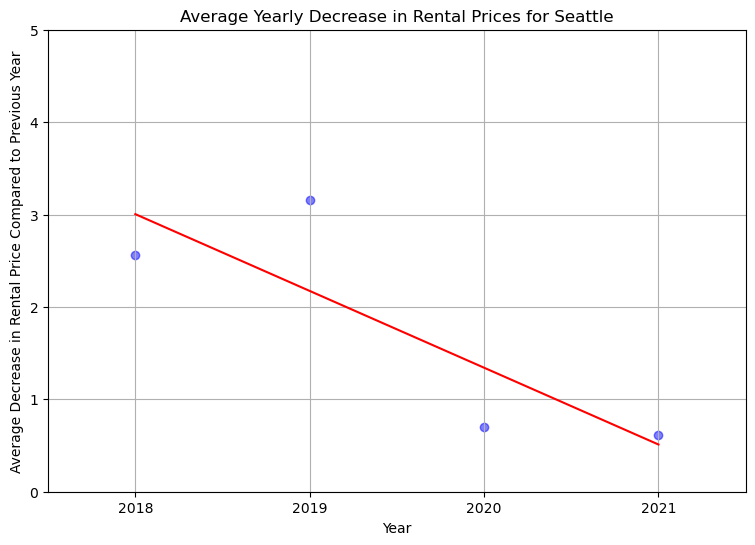

y = -0.83x +1679.96


In [67]:
x_values = pd.to_numeric(rounded_average_yearly_increase.index)
y_values = rounded_average_yearly_increase.values


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Yearly Decrease in Rental Prices for Seattle")
plt.xlabel('Year')
plt.ylabel('Average Decrease in Rental Price Compared to Previous Year')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2017.5, 2021.5)
plt.ylim(0,5) 
plt.xticks(x_values, [str(year) for year in x_values])  # Rotate labels and set font size
plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)

In [68]:
plt.savefig("../figures/fig_percent_increase_rentals.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
# # Save the data and keep the index for quarters
# saleprice_averages_by_quarter.to_csv("../data_frames/saleprice_quarterly_AVG.csv", index=True)

In [73]:
# Import from CSV
q_sales = pd.read_csv("../data_frames/saleprice_quarterly_AVG.csv", index_col=0)
q_sales

,0
2017-Q1,602734.384615
2017-Q2,639774.884615
2017-Q3,660199.692308
2017-Q4,675987.384615
2018-Q1,718276.000000
2018-Q2,760614.192308
2018-Q3,731133.807692
2018-Q4,702407.923077
2019-Q1,683218.076923
2019-Q2,702495.307692


In [75]:
q_sales.reset_index(inplace=True)
q_sales.columns = ['Quarter', 'Average Sale Price']

In [76]:
q_sales['Year'] = q_sales['Quarter'].str[:4]

In [77]:
q_sales['Average Sale Price'] = pd.to_numeric(q_sales['Average Sale Price'])

In [78]:
yearly_averages = q_sales.groupby('Year')['Average Sale Price'].mean()

In [79]:
percentage_changes = yearly_averages.pct_change() * 100

In [80]:
percentage_changes = percentage_changes.dropna()

In [81]:
percentage_changes

Year
2018    12.942027
2019    -4.677567
2020     5.059834
2021     6.493371
Name: Average Sale Price, dtype: float64

In [86]:
saledata = {
'2018':    12.942027,
'2019':    -4.677567,
'2020':     5.059834,
'2021':     6.493371
}
rounded_average_yearly_increasesales = pd.Series(saledata)
rounded_average_yearly_increasesales

2018    12.942027
2019    -4.677567
2020     5.059834
2021     6.493371
dtype: float64

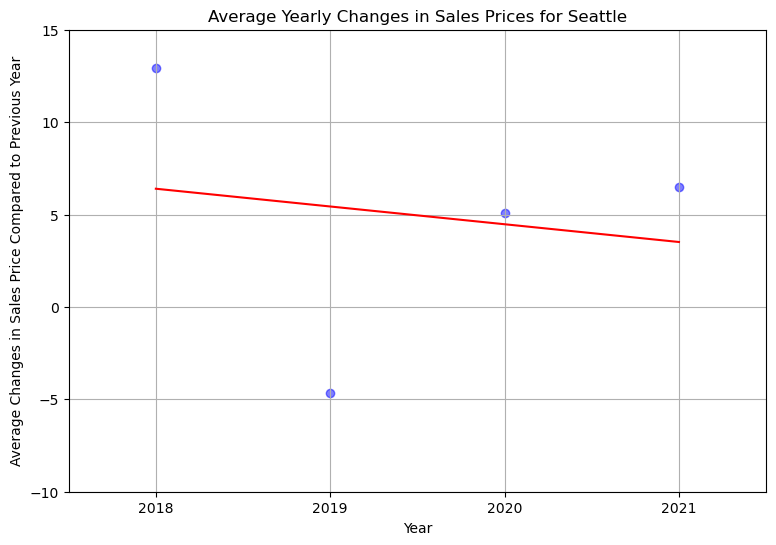

y = -0.96x +1945.4


In [88]:
x_values = pd.to_numeric(rounded_average_yearly_increasesales.index)
y_values = rounded_average_yearly_increasesales.values


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Yearly Changes in Sales Prices for Seattle")
plt.xlabel('Year')
plt.ylabel('Average Changes in Sales Price Compared to Previous Year')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2017.5, 2021.5)
plt.ylim(-10,15) 
plt.xticks(x_values, [str(year) for year in x_values])  # Rotate labels and set font size
plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)